<a href="https://colab.research.google.com/github/JonathanMtz1103987/Mineria-de-Datos/blob/main/Clasificaci%C3%B3n_de_tumores_Jonathan_Martinez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Universidad Juárez del Estado de Durango**
# **Facultad de Ciencias Exactas**

## **Maestría en Estadística Aplicada**

## Clasificación de Tumores Cerebrales (Machine Learning Supervisado)*

### Nombre del Estudiante: Jonathan Martinez Perez

### Fecha: Durango, DGO. 13 de febrero de 2026


# **Introducción**
En el presente proyecto se desarrolla un modelo de clasificación supervisada con el objetivo de predecir el resultado del estudio de resonancia magnética en pacientes con posible tumor cerebral.

El análisis sigue un flujo de preprocesamiento de datos, partición, entrenamiento de varios algoritmos de clasificación y evaluación comparativa de desempeño.

Finalmente, se comparan diversos modelos de algoritmos de con el fin de identificar cuál presenta mejor capacidad predictiva, evaluando métricas como accuracy, precisión, recall y F1-score. Este enfoque permite analizar no solo el rendimiento del modelo, sino también la calidad predictiva de las variables disponibles en el dataset.

Dimensiones: (20000, 19)


,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [10]:
#Se separa la variable objetivo
target = "MRI_Result"

X = df.drop(columns=[target])
y = df[target]


In [4]:
#Division del 50%
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.5,
    stratify=y,
    random_state=42
)


In [5]:
#Division del 50% restante para la validacion y la prueba
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=42
)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)


Train: (10000, 18)
Validation: (5000, 18)
Test: (5000, 18)


In [6]:
#Preprocesamiento (Identificacion de variables numericas y categoricas)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(exclude=np.number).columns


In [7]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


In [8]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


In [9]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [11]:
#Entrenamiento de modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}


In [12]:
#Evaluacion del conjunto de datos de validacion
from sklearn.metrics import accuracy_score

results = {}

for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_val)

    acc = accuracy_score(y_val, y_pred)
    results[name] = acc
    print(f"{name}: {acc:.4f}")


Logistic Regression: 0.4846
Random Forest: 0.5066
SVM: 0.4964
KNN: 0.4996
Decision Tree: 0.4974


In [14]:
#Seleccionamos el mejor modelo
best_model_name = max(results, key=results.get)
print("Mejor modelo:", best_model_name)


Mejor modelo: Random Forest


Accuracy Test: 0.5004

Reporte de Clasificación:
              precision    recall  f1-score   support

    Negative       0.50      0.52      0.51      2492
    Positive       0.50      0.48      0.49      2508

    accuracy                           0.50      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       0.50      0.50      0.50      5000



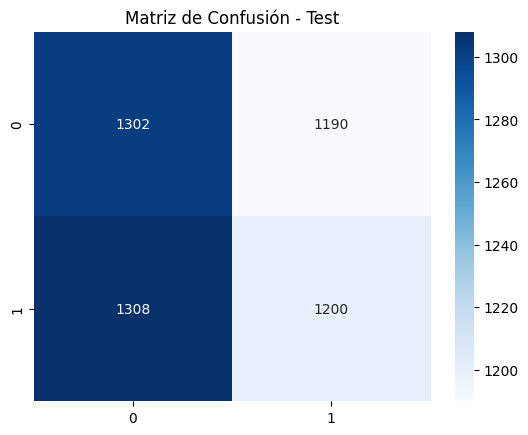

In [15]:
#Evaluacion en el test
from sklearn.metrics import classification_report, confusion_matrix
best_model = models[best_model_name]

final_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", best_model)
])

final_pipeline.fit(X_train, y_train)

y_test_pred = final_pipeline.predict(X_test)


print("Accuracy Test:", accuracy_score(y_test, y_test_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_test_pred))

sns.heatmap(confusion_matrix(y_test, y_test_pred),
            annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Test")
plt.show()


In [16]:

from sklearn.model_selection import GridSearchCV
param_grid = {
    "model__n_estimators": [300, 500, 800],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 3, 5]
}

rf_base = RandomForestClassifier(random_state=42)

pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", rf_base)
])

grid = GridSearchCV(
    pipe,
    param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Mejor modelo:", grid.best_params_)
print("Mejor accuracy CV:", grid.best_score_)


Mejor modelo: {'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 500}
Mejor accuracy CV: 0.4996002299690077


# **Conclusión** #
A pesar de aplicar múltiples algoritmos de clasificación y optimización de hiperparámetros (Random Forest con GridSearch), el desempeño del modelo se mantuvo alrededor de 0.50 de accuracy. Esto nos indica que las variables disponibles no presentan una relación predictiva significativa con la variable de respuesta, lo que posiblemente nos indica independencia estadística entre las características clínicas y el diagnóstico.